# Kepler Framework Examples

In [1]:
from kepler.pandas import RingerDecorator
from kepler.pandas import ElectronSequence as Chain
from kepler.pandas import load
from kepler.pandas import drop_ring_columns
import numpy as np
import pandas as pd
import collections
import os
import matplotlib
import matplotlib.pyplot as plt
from pprint import pprint
from copy import deepcopy
import gc
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.16/00
Using all sub packages with ROOT dependence


In [2]:
# data path
dpath = '/home/natmourajr/Workspace/CERN/Qualify/data/data17_13TeV.AllPeriods.sgn.probes_lhvloose_EGAM1.bkg.vprobes_vlhvloose_EGAM7.GRL_v97.25bins'
dpath+= '/data17_13TeV.AllPeriods.sgn.probes_lhvloose_EGAM1.bkg.vprobes_vlhvloose_EGAM7.GRL_v97.25bins_et{ET}_eta{ETA}.npz'

# tuning path
ringer_version = "TrigL2_20180125_v8"
tpath = os.path.join('/home/natmourajr/Workspace/CERN/CERN-ATLAS-Qualify/analysis/tunings',ringer_version)
tpath+= '/ElectronRingerTightTriggerConfig.conf'

In [3]:
 drop_columns = [
        'RunNumber', 
        #'avgmu', 
        #'trig_L2_cl_et', 
        #'trig_L2_cl_eta',
        #'trig_L2_cl_phi', 
        #'trig_L2_cl_reta', 
        #'trig_L2_cl_ehad1',
        #'trig_L2_cl_eratio', 
        #'trig_L2_cl_f1', 
        #'trig_L2_cl_f3',
        #'trig_L2_cl_weta2', 
        #'trig_L2_cl_wstot', 
        'trig_L2_cl_e2tsts1',
        'trig_L2_el_hastrack', 
        'trig_L2_el_pt', 
        'trig_L2_el_eta',
        'trig_L2_el_phi', 
        'trig_L2_el_caloEta', 
        'trig_L2_el_trkClusDeta',
        'trig_L2_el_trkClusDphi', 
        'trig_L2_el_etOverPt', 
        'trig_EF_cl_et',
        'trig_EF_el_et', 
        'trig_EF_el_lhtight', 
        'trig_EF_el_lhmedium',
        'trig_EF_el_lhloose', 
        'trig_EF_el_lhvloose', 
        #'el_et', 
        #'el_eta',
        'el_etaBE2', 
        #'el_phi', 
        #'el_rhad1', 
        #'el_rhad', 
        #'el_f3', 
        #'el_weta2',
        #'el_rphi',
        #'el_reta', 
        #'el_wtots1', 
        #'el_eratio', 
        #'el_f1', 
        #'el_hastrack',
        #'el_numberOfBLayerHits', 
        #'el_numberOfPixelHits', 
        #'el_numberOfTRTHits',
        #'el_d0',
        #'el_d0significance', 
        #'el_eProbabilityHT', 
        #'el_trans_TRT_PID',
        #'el_deltaEta1', 
        #'el_deltaPhi2', 
        #'el_deltaPhi2Rescaled',
        #'el_deltaPOverP', 
        #'el_lhtight',
        #'el_lhmedium',
        #'el_lhloose',
        #'el_lhvloose', 
        #'el_TaP_deltaR', 
        #'trig_EF_el_lhtight_ivarloose',
        'L1_EM3', 
        'L1_EM7', 
        'L1_EM15VH', 
        'L1_EM15VHI',
        'L1_EM20VH',
        'L1_EM20VHI', 
        'L1_EM22VH', 
        'L1_EM22VHI', 
        'L1_EM24VHI',
        'trig_L2_cl_lhvloose_et0to12', 
        'trig_L2_cl_lhvloose_et12to20',
        'trig_L2_cl_lhvloose_et22toInf', 
        'trig_L2_cl_lhloose_et0to12',
        'trig_L2_cl_lhloose_et12to20', 
        'trig_L2_cl_lhloose_et22toInf',
        'trig_L2_cl_lhmedium_et0to12', 
        'trig_L2_cl_lhmedium_et12to20',
        'trig_L2_cl_lhmedium_et22toInf', 
        'trig_L2_cl_lhtight_et0to12',
        'trig_L2_cl_lhtight_et12to20', 
        'trig_L2_cl_lhtight_et22toInf',
        'trig_L2_el_cut_pt0to15', 
        'trig_L2_el_cut_pt15to20',
        'trig_L2_el_cut_pt20to50', 
        'trig_L2_el_cut_pt50toInf', 
        #'target'
        ]

## Setup Ringer v8:

In [4]:
def my_generator( df ):
    col_names= ['trig_L2_cl_ring_%d'%i for i in range(100)]
    rings = df[col_names].values.astype(np.float32)
    def norm1( data ):
        norms = np.abs( data.sum(axis=1) )
        norms[norms==0] = 1
        return data/norms[:,None]
    rings = norm1(rings)
    return [rings]

v8_tight = RingerDecorator(tpath, my_generator)
decorators = [('ringer_v8_tight', v8_tight)]

2021-11-08 16:33:56,379 | Py.RingerDecorator                      INFO Reading... /home/natmourajr/Workspace/CERN/CERN-ATLAS-Qualify/analysis/tunings/TrigL2_20180125_v8/ElectronRingerTightTriggerConfig.conf


2021-11-08 16:33:56.398968: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-08 16:33:56.399179: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-08 16:33:56.399196: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: UNKNOWN ERROR (-1)
2021-11-08 16:33:56.399211: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (caloba52): /proc/driver/nvidia/version does not exist
2021-11-08 16:33:56.399412: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-08 16:33:56.405155: I tensorflow/compiler/

## Setup Chains:

In [5]:
# create my chain
my_chain1 = Chain( "HLT_e24_lhtight_nod0_ivarloose", L1Seed = 'L1_EM22VHI', l2calo_column = 'ringer_v8_tight' )

OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'ringer_v8_tight')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])


In [6]:
my_chain2 = Chain( "HLT_e24_lhtight_nod0_noringer_ivarloose", L1Seed = 'L1_EM22VHI' )

OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'trig_L2_cl_lhtight_et22toInf')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])


In [7]:
chains = [
            ("e24_lhtight_nod0_ivarloose", my_chain1), 
            ("e24_lhtight_nod0_noringer_ivarloose", my_chain2),
         ]

## Read all bins:

In [8]:

def read_all_files( path , decorators, chains = [], drop_rings=True, drop_other_columns = [] ):
    df_list = []
    for et_bin in range(4,5):    
        for eta_bin in range(0,1):
            print(path.format(ET=et_bin, ETA=eta_bin ))
            df_temp = load( path.format(ET=et_bin, ETA=eta_bin ) )
            
            # propagate ringer
            for column, decorator in decorators:
                # Apply v8 column
                decorator.apply( df_temp, column, batch_size=2048 )
                
            # emulate chains
            for column, chain in chains:
                chain.apply(df_temp, column)
            
            if drop_rings:
                drop_ring_columns(df_temp)
            if drop_other_columns:
                df_temp.drop( drop_other_columns, axis=1, inplace=True )
                
            df_list.append(df_temp)
            
    return pd.concat(df_list)
                           
df = read_all_files(dpath, decorators=decorators, chains=chains, drop_other_columns=drop_columns, drop_rings=True)    

/home/natmourajr/Workspace/CERN/Qualify/data/data17_13TeV.AllPeriods.sgn.probes_lhvloose_EGAM1.bkg.vprobes_vlhvloose_EGAM7.GRL_v97.25bins/data17_13TeV.AllPeriods.sgn.probes_lhvloose_EGAM1.bkg.vprobes_vlhvloose_EGAM7.GRL_v97.25bins_et4_eta0.npz
2735/2735 [==============================] - 5s 2ms/step
2021-11-08 16:34:24,882 | Py.RingerDecorator                      INFO Propagate for bin (4, 0)
2021-11-08 16:34:44,102 | Py.RingerDecorator                      INFO Decide for bin (4, 0)
2021-11-08 16:34:47,154 | Py.ElectronSequence                     INFO Number of events   : 5599840
2021-11-08 16:34:47,154 | Py.ElectronSequence                     INFO Number of events   : 5599840
2021-11-08 16:34:50,911 | Py.ElectronSequence                     INFO Approved by L1     : 5549281
2021-11-08 16:34:50,911 | Py.ElectronSequence                     INFO Approved by L1     : 5549281
2021-11-08 16:34:52,293 | Py.ElectronSequence                     INFO Approved by L2Calo : 1811603
2021-11-08

2021-11-08 16:34:33.664653: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-08 16:34:33.684011: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2400000000 Hz


In [17]:
df = df.reset_index(drop=True)

In [18]:
list(df.columns)

['avgmu',
 'trig_L2_cl_et',
 'trig_L2_cl_eta',
 'trig_L2_cl_phi',
 'trig_L2_cl_reta',
 'trig_L2_cl_ehad1',
 'trig_L2_cl_eratio',
 'trig_L2_cl_f1',
 'trig_L2_cl_f3',
 'trig_L2_cl_weta2',
 'trig_L2_cl_wstot',
 'el_et',
 'el_eta',
 'el_phi',
 'el_rhad1',
 'el_rhad',
 'el_f3',
 'el_weta2',
 'el_rphi',
 'el_reta',
 'el_wtots1',
 'el_eratio',
 'el_f1',
 'el_hastrack',
 'el_numberOfBLayerHits',
 'el_numberOfPixelHits',
 'el_numberOfTRTHits',
 'el_d0',
 'el_d0significance',
 'el_eProbabilityHT',
 'el_trans_TRT_PID',
 'el_deltaEta1',
 'el_deltaPhi2',
 'el_deltaPhi2Rescaled',
 'el_deltaPOverP',
 'el_lhtight',
 'el_lhmedium',
 'el_lhloose',
 'el_lhvloose',
 'trig_EF_el_lhtight_ivarloose',
 'el_TaP_Mass',
 'el_TaP_deltaR',
 'TDT__L1Calo__e28_lhtight_nod0_ivarloose',
 'TDT__L2Calo__e28_lhtight_nod0_ivarloose',
 'TDT__L2__e28_lhtight_nod0_ivarloose',
 'TDT__EFCalo__e28_lhtight_nod0_ivarloose',
 'TDT__HLT__e28_lhtight_nod0_ivarloose',
 'TDT__L1Calo__e28_lhtight_nod0_noringer_ivarloose',
 'TDT__L2Calo

## Plot Efficiencies:

In [12]:
from kepler.analysis.efficiency import Efficiency
eff = Efficiency('my_efficiencies.root')

2021-11-08 16:39:51,363 | Py.Efficiency                           INFO Creating the StoreGate service with path: my_efficiencies.root


In [13]:
help(eff.fill)

Help on method fill in module kepler.analysis.efficiency.Efficiency:

fill(df, trigger, pidname=None) method of kepler.analysis.efficiency.Efficiency.Efficiency instance
    # Fill a specific trigger



In [14]:
eff.fill(df[df.target==1], 'e24_lhtight_nod0_ivarloose' , pidname = 'el_lhtight')
eff.fill(df[df.target==1], 'e24_lhtight_nod0_noringer_ivarloose' , pidname = 'el_lhtight')

2021-11-08 16:40:17,607 | Py.Efficiency                           INFO Booking histograms for e24_lhtight_nod0_ivarloose
2021-11-08 16:40:38,214 | Py.Efficiency                           INFO Booking histograms for e24_lhtight_nod0_noringer_ivarloose


In [16]:
help(eff)

Help on Efficiency in module kepler.analysis.efficiency.Efficiency object:

class Efficiency(Gaugi.Logger.Logger)
 |  Simple class for giving inherited classes logging capability as well as the
 |  possibility for being serialized by pickle.
 |  Logger will keep its logging level even after unpickled.
 |  
 |  Method resolution order:
 |      Efficiency
 |      Gaugi.Logger.Logger
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __del__(self)
 |  
 |  __init__(self, output, triggers=['e24_lhtight_nod0_ivarloose', 'e24_lhtight_nod0_noringer_ivarloose'], etbins=[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0, 55.0, 60.0, 65.0, 70.0, 100.0], etabins=[-2.47, -2.37, -2.01, -1.81, -1.52, -1.37, -1.15, -0.8, -0.6, -0.1, 0.0, 0.1, 0.6, 0.8, 1.15, 1.37, 1.52, 1.81, 2.01, 2.37, 2.47], mubins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], delt

In [13]:
eff.save()

In [14]:
eff_eta_e24 = eff.profile( 'HLT_e24_lhtight_nod0_ivarloose', 'eta' )
eff_eta_e24_noringer = eff.profile( 'HLT_e24_lhtight_nod0_noringer_ivarloose', 'eta' )

In [21]:
import ROOT
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
eff_eta_e24.Draw()

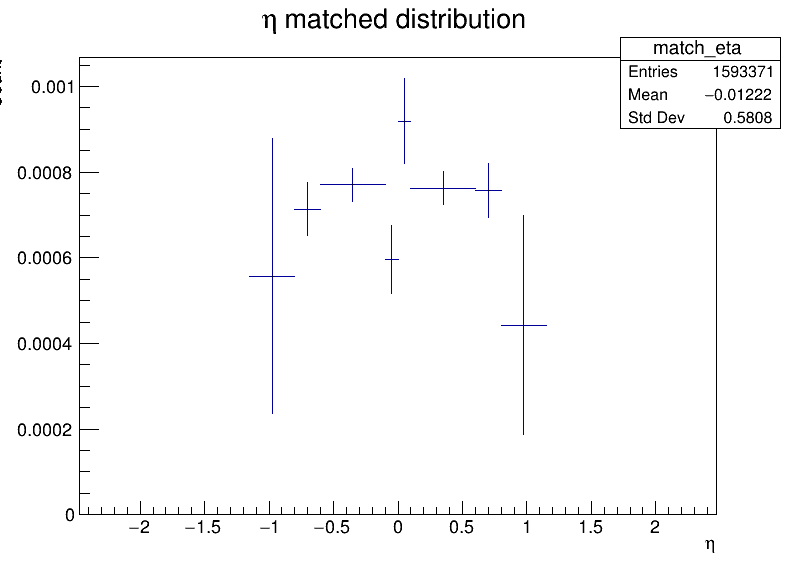

In [22]:
c.Draw()

## Plot Quadrants:

In [23]:
from kepler.analysis.quadrant.Quadrant import Quadrant
quad = Quadrant( "my_quadrant.root" )

2021-09-30 22:30:37,370 | Py.Quadrant                             INFO Creating the StoreGate service with path: my_quadrant.root


In [25]:
quad.fill( df[df.target==1],  'HLT_e24_lhtight_nod0_ivarloose', 'HLT_e24_lhtight_nod0_noringer_ivarloose', 'el_lhtight')

In [26]:
quad.save()

In [27]:
quad.